In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
from dateutil.relativedelta import relativedelta
import pandas as pd
import calmap
from sklearn.model_selection import TimeSeriesSplit

%matplotlib inline
import matplotlib.style as style 
import warnings
warnings.simplefilter('ignore')

ModuleNotFoundError: No module named 'calmap'

In [2]:
data = pd.read_csv('ml_dataset.csv',parse_dates=['date'])

In [6]:
data.head(10)

,date,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,Unnamed: 17,target_value,target_class
0,2012-01-02,"1,997",107.38,647.12,2.989,NaN,100.01969,99.99426,780.009937,"2,046.54","2,206.40",100.0185205,100.01513,100.02063,99.99438,100.05073,100.00010,NaN,59.324325,0
1,2012-01-03,"2,054.50",112.13,659.88,2.993,NaN,100.02017,99.99412,759.164751,"1,988.59","2,142.35",100.0215198,100.01485,100.02053,99.99495,100.06121,100.00026,NaN,60.971989,0
2,2012-01-04,"2,041.25",113.70,659.12,3.096,NaN,100.01999,99.99390,732.813473,"1,914.14","2,061.66",100.0231573,100.01392,100.02005,99.99546,100.06965,100.00031,NaN,61.100708,0
3,2012-01-05,"2,013",112.74,642.38,2.980,NaN,100.01942,99.99319,713.076630,"1,858.52","2,001.38",100.0242366,100.01168,100.01942,99.99580,100.07656,100.00034,NaN,60.808938,0
4,2012-01-06,"2,045.75",113.06,644.38,3.062,NaN,100.01914,99.99261,694.993964,"1,807.86","1,946.24",100.0258732,100.01071,100.01931,99.99592,100.08451,100.00039,NaN,60.448514,0
5,2012-01-09,"2,085.25",112.45,654.38,3.011,NaN,100.01904,99.99205,670.015580,"1,736.77","1,869.87",100.0273501,100.01009,100.01904,99.99592,100.09152,100.00043,NaN,60.740284,0
6,2012-01-10,"2,138.50",113.28,652.88,2.941,NaN,100.01842,99.99156,647.441296,"1,672.60","1,800.71",100.0276357,100.00825,100.01782,99.99581,100.09608,100.00040,NaN,61.280926,0
7,2012-01-11,"2,137.25",112.24,652.88,2.774,NaN,100.01812,99.99094,626.465567,"1,612.94","1,736.20",100.0274133,100.00584,100.01651,99.99545,100.10105,100.00036,NaN,60.457091,0
8,2012-01-12,"2,134.25",111.26,611.88,2.697,NaN,100.01766,99.99031,602.710355,"1,544.93","1,662.51",100.0265106,100.00291,100.0148,99.99503,100.10490,100.00024,NaN,59.890711,0
9,2012-01-13,"2,114.25",110.44,599.62,2.670,NaN,100.01721,99.99000,582.153452,"1,486.28","1,599.00",100.0255809,100.00042,100.01331,99.99467,100.10783,100.00027,NaN,59.590358,0


In [3]:
# test train spliting
def train_test_split(df, start1, finish1, start2, finish2):
    train= df.loc[(df.date >= start1)&\
                  (df.date <= finish1)]
    test = df.loc[(df.date >= start2)&\
                  (df.date <= finish2)]
    return train, test

In [4]:
start1 = '2010-01-01'
finish1 = '2016-10-31'
start2 = '2017-01-02'
finish2 = '2018-06-19'
train, test = train_test_split(data, start1, finish1, start2, finish2)

Text(0.9,0.23,'Test')

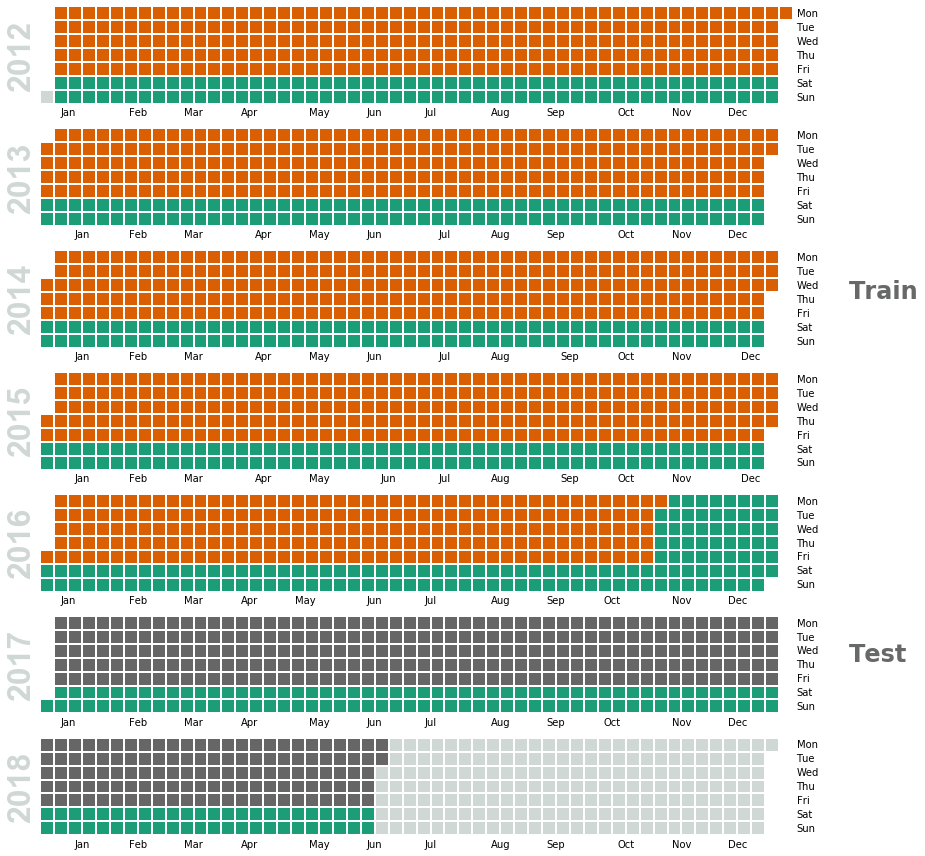

In [5]:
#vizualizing train and test time period 
tmp_train = train.date.value_counts()
test_data = test.date.value_counts()*5
all_data = pd.concat([tmp_train, test_data])

fig, ax = calmap.calendarplot(all_data, fig_kws={"figsize":(15,12)}, fillcolor='#d0d8d6', cmap='Dark2')
fig.text(x=0.9, y=0.65, s="Train", fontsize=24, weight='bold', color='#676868')
fig.text(x=0.9, y=0.23, s="Test", fontsize=24, weight='bold', color='#676868')

The dataset doesn't include weekends

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687 entries, 0 to 1686
Data columns (total 20 columns):
date            1687 non-null datetime64[ns]
feature_1       1687 non-null object
feature_2       1687 non-null float64
feature_3       1687 non-null float64
feature_4       1687 non-null float64
feature_5       1479 non-null float64
feature_6       1687 non-null float64
feature_7       1687 non-null float64
feature_8       1687 non-null float64
feature_9       1687 non-null object
feature_10      1687 non-null object
feature_11      1687 non-null object
feature_12      1687 non-null object
feature_13      1687 non-null object
feature_14      1687 non-null float64
feature_15      1687 non-null float64
feature_16      1687 non-null float64
Unnamed: 17     0 non-null float64
target_value    1687 non-null float64
target_class    1687 non-null int64
dtypes: datetime64[ns](1), float64(12), int64(1), object(6)
memory usage: 263.7+ KB


# Exploratory Data Analysis

Text(0.5,0,'features')

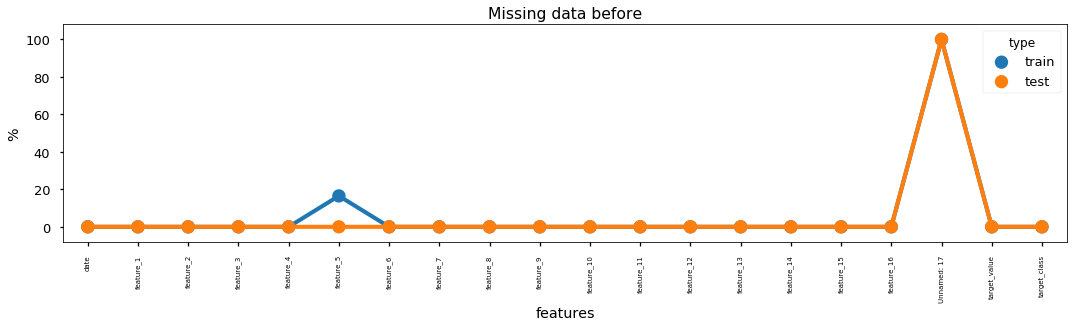

In [7]:
#missing data plot
plt.style.use('seaborn-talk')
fig = plt.figure(figsize=(18,4))
miss_train = pd.DataFrame((train.isnull().sum())*100/train.shape[0]).reset_index()
miss_test = pd.DataFrame((test.isnull().sum())*100/test.shape[0]).reset_index()
miss_train['type'] = 'train'
miss_test['type']  =  'test'
missing = pd.concat([miss_train,miss_test],axis=0)
ax = sns.pointplot('index',0,data=missing,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title('Missing data before')
plt.ylabel("%")
plt.xlabel("features")

In [8]:
#droping 'Unnamed: 17' cause it has 100% missing data
train = train.drop('Unnamed: 17', axis=1)
test = test.drop('Unnamed: 17', axis=1)

#filling missing data in 'feature_5' by median value
train['feature_5'] = train['feature_5'].fillna(train['feature_5'].median()) 

Text(0.5,0,'features')

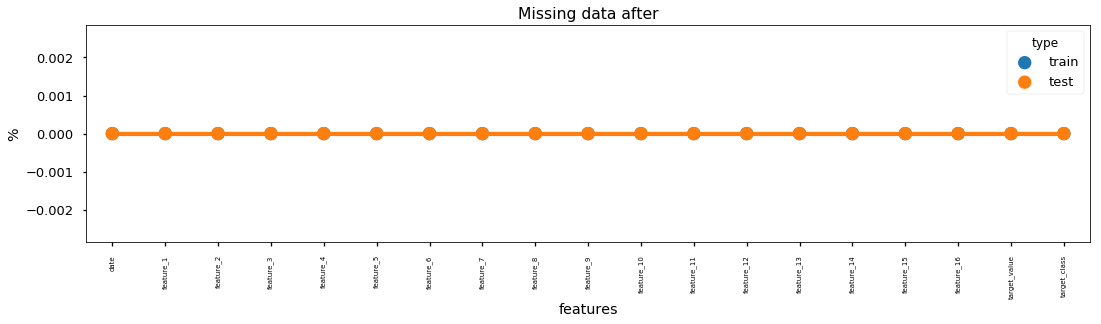

In [9]:
#missing data plot after working with features
plt.style.use('seaborn-talk')
fig = plt.figure(figsize=(18,4))
miss_train = pd.DataFrame((train.isnull().sum())*100/train.shape[0]).reset_index()
miss_test = pd.DataFrame((test.isnull().sum())*100/test.shape[0]).reset_index()
miss_train['type'] = 'train'
miss_test['type']  =  'test'
missing = pd.concat([miss_train,miss_test],axis=0)
ax = sns.pointplot('index',0,data=missing,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title('Missing data after')
plt.ylabel("%")
plt.xlabel("features")

In [10]:
# types of data
train.dtypes.value_counts()

float64           11
object             6
datetime64[ns]     1
int64              1
dtype: int64

In [11]:
# column name with object data type
train.select_dtypes(include=[object]).apply(pd.Series.nunique, axis = 0)

feature_1      921
feature_9     1260
feature_10    1261
feature_11    1260
feature_12    1171
feature_13    1169
dtype: int64

In [12]:
#rewriting features in float type
def change_c(train, test):
    train_df = train.copy()
    train_df['feature_9'] = train.feature_9.apply(lambda x : x.replace(',', '')).astype(float)
    train_df['feature_10'] = train.feature_10.apply(lambda x : x.replace(',', '')).astype(float)
    train_df['feature_11'] = train.feature_11.apply(lambda x : x.replace(',', '')).astype(float)
    train_df['feature_12'] = train.feature_12.apply(lambda x : x.replace(',', '')).astype(float)
    train_df['feature_13'] = train.feature_13.apply(lambda x : x.replace(',', '')).astype(float)
    train_df['feature_1'] = train.feature_1.apply(lambda x : x.replace(',', '')).astype(float)
    
    test_df = test.copy()
    test_df['feature_9'] = test.feature_9.apply(lambda x : x.replace(',', '')).astype(float)
    test_df['feature_10'] = test.feature_10.apply(lambda x : x.replace(',', '')).astype(float)
    test_df['feature_11'] = test.feature_11.apply(lambda x : x.replace(',', '')).astype(float)
    test_df['feature_12'] = test.feature_12.apply(lambda x : x.replace(',', '')).astype(float)
    test_df['feature_13'] = test.feature_13.apply(lambda x : x.replace(',', '')).astype(float)
    test_df['feature_1'] = test.feature_1.apply(lambda x : x.replace(',', '')).astype(float) 
    return train_df, test_df

train_c, test_c = change_c(train, test)

Text(0.5,1,'Correlation')

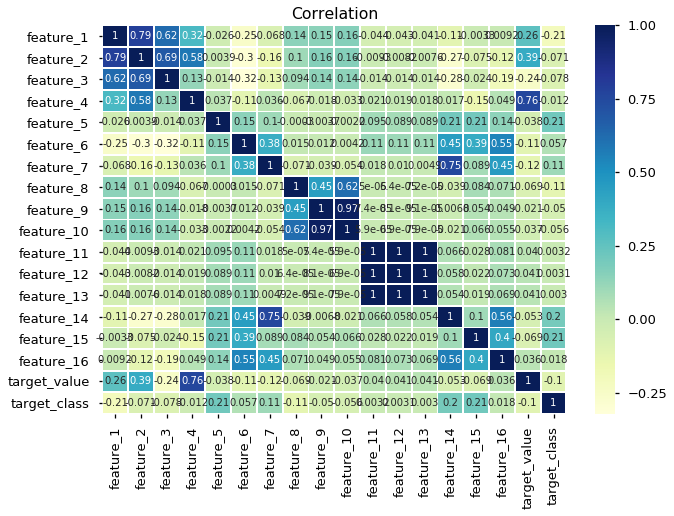

In [13]:
#correlation map
sns.heatmap(train_c.corr(),annot=True,linewidths=.9,cmap="YlGnBu")
plt.title('Correlation')

In [14]:
#droping features with hight correlaion
def  drop_hight_col(train, test):
    train = train.drop(['feature_11','feature_12','feature_10'],axis = 1)
    test = test.drop(['feature_11','feature_12','feature_10'],axis = 1)
    return train, test

train_c2, test_c2 = drop_hight_col(train_c, test_c)

Text(0.5,1,'Correlation map after cleaning')

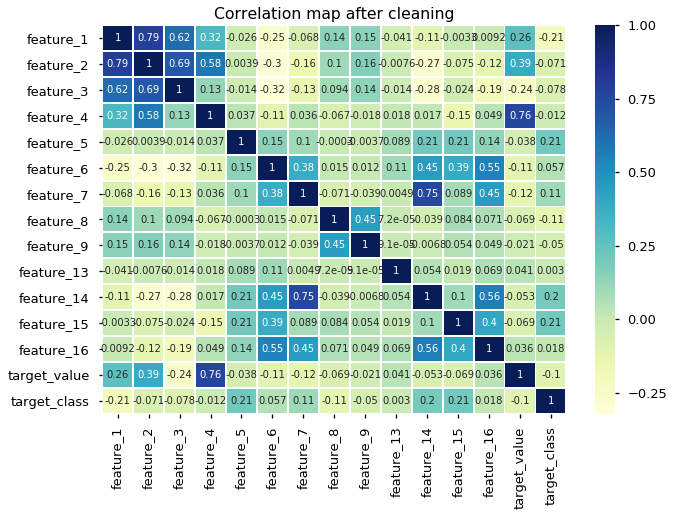

In [15]:
#correlation map after claening
sns.heatmap(train_c2.corr(),annot=True,linewidths=.9,cmap="YlGnBu")
plt.title('Correlation map after cleaning')

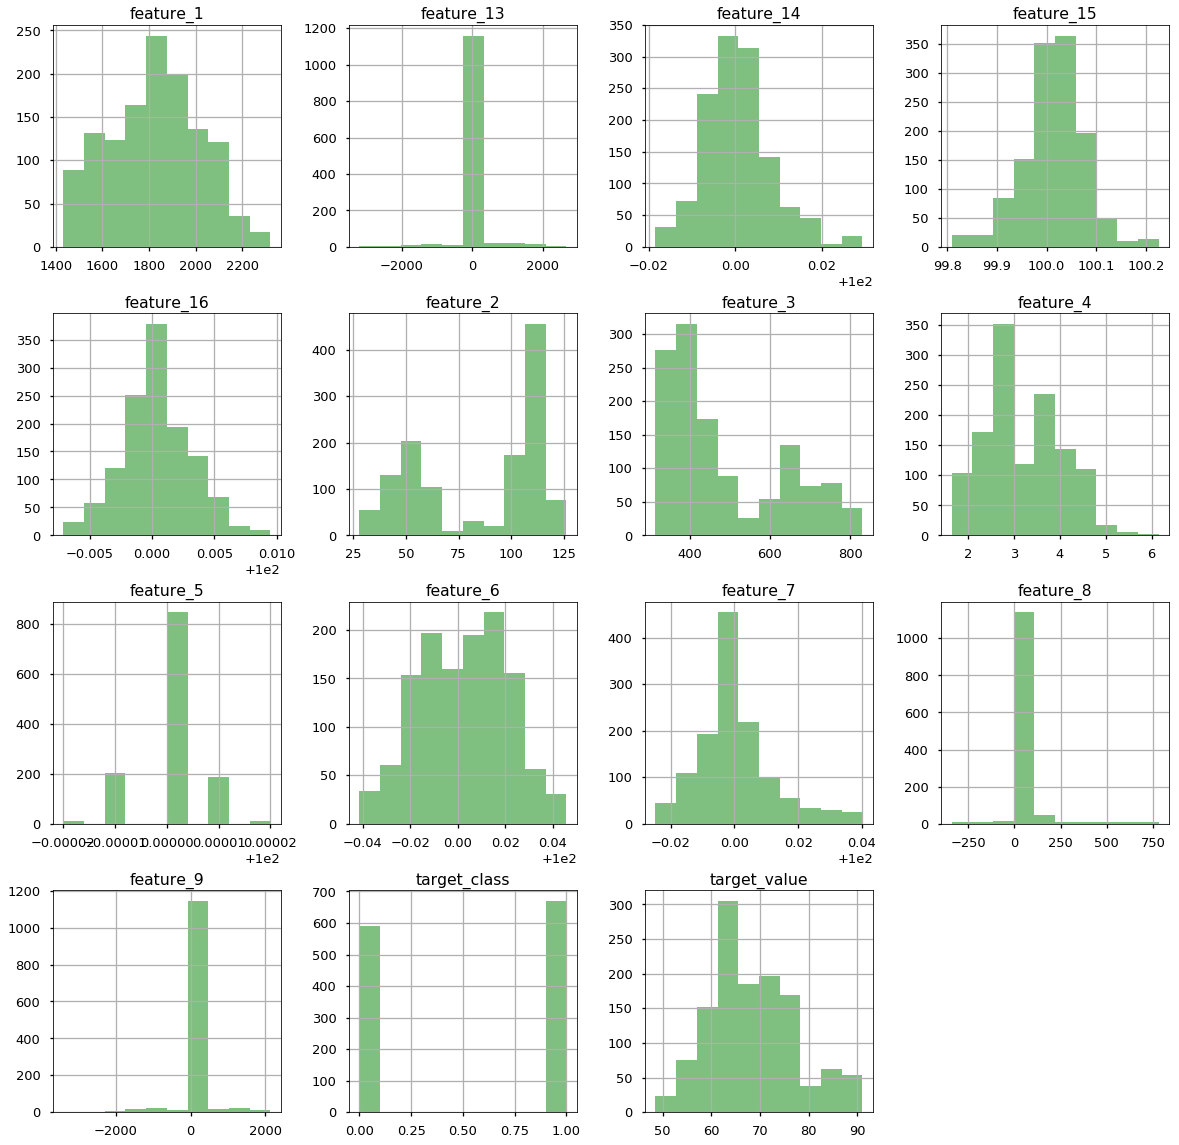

In [16]:
#histogram plots of every features
plt.figure();
train_c2.hist(color='g', alpha=0.5,figsize=(20, 20));

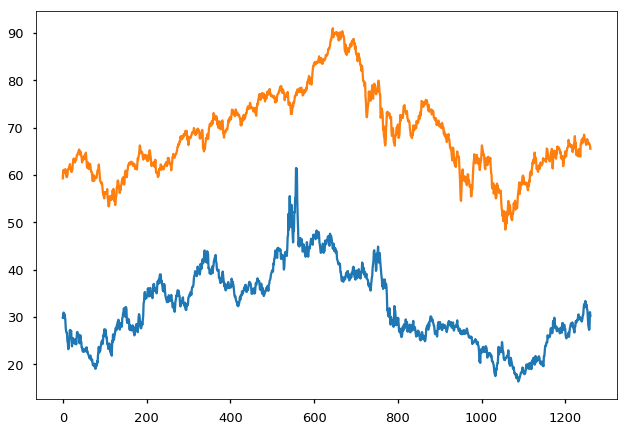

In [17]:
# plot with feature_4 and target_value
plt.plot(train_c2['feature_4']*10)
plt.plot(train_c2['target_value'])

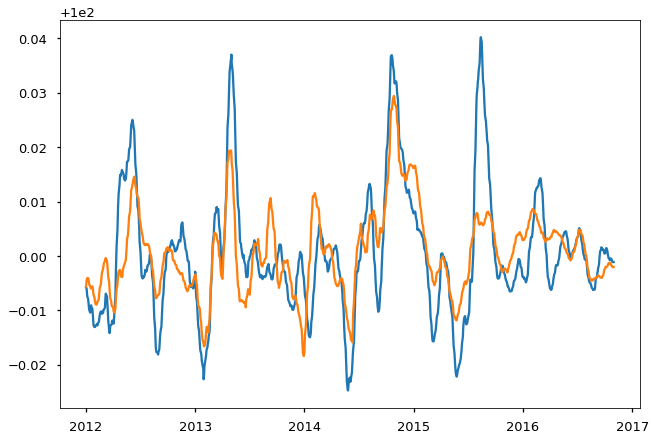

In [18]:
#plot with feature_7 and feature_14
plt.plot(train_c2['date'],train_c2['feature_7'])
plt.plot(train_c2['date'],train_c2['feature_14'])

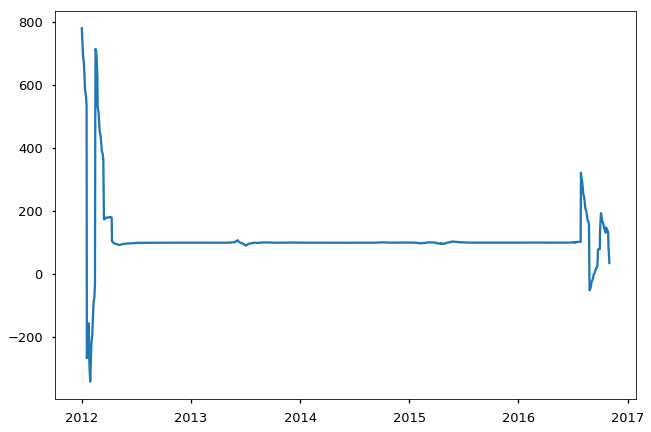

In [19]:
#plot feature_8(date)
plt.plot(train_c2 ['date'],train_c2['feature_8'] )

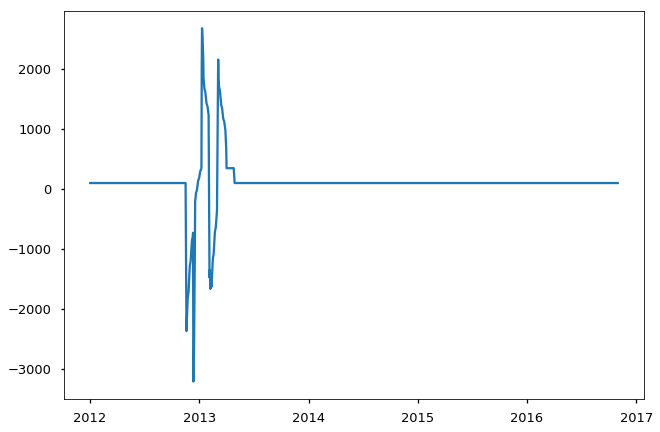

In [20]:
#plot feature_13(date)
plt.plot(train_c2 ['date'],train_c2['feature_13'] )

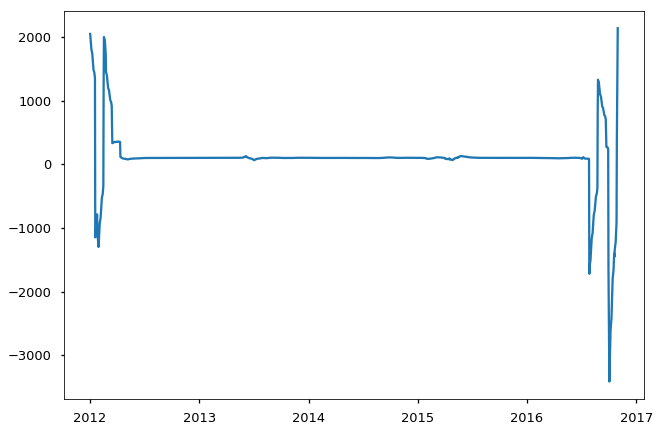

In [21]:
#plot feature_9(date)
plt.plot(train_c2 ['date'],train_c2['feature_9'] )

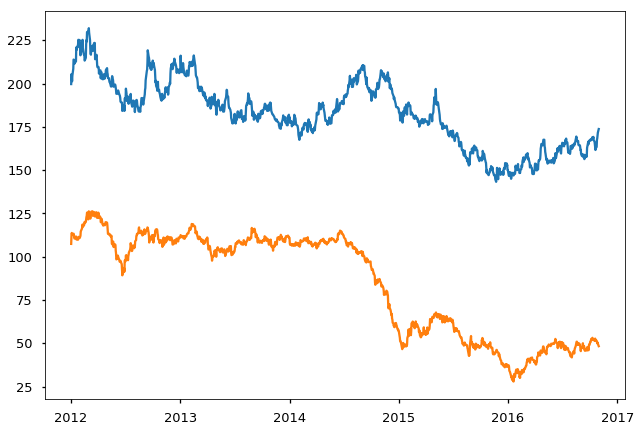

In [22]:
#plotting feature_1(date)  and feature_2(date)
plt.plot(train_c2['date'],train_c2['feature_1']/10)
plt.plot(train_c2['date'],train_c2['feature_2'])

In [23]:
# for making new features
def get_features(train):
    train_df = train.copy()
    train_df['dayofweek'] = train.date.apply(lambda x: x.dayofweek )
    train_df['dayofmonth'] = train.date.apply(lambda x: x.day )
    train_df['year'] = train.date.apply(lambda x : x.year )
    train_df['week'] = train_df.date.apply(lambda x: x.week)
    '''train_df['tw_8b'] = train.feature_8.apply(lambda x: 1 if x not in range(100,110) else 0 )
    train_df['diff_f14_7'] = train['feature_14'] -train['feature_7']
    train_df['diff_f410_tar'] = train['target_value'] - train['feature_4'].apply(lambda x: x*10)
    train_df['f_9'] = train.feature_9.apply(lambda x: 0 if -100 <=x <=100 else 1)
    train_df['f_13'] = train.feature_13.apply(lambda x: 0 if -200 <=x <=200 else 1)
    train_df['f_1_2']  = train.feature_1.apply(lambda x: x/10) - train['feature_2']'''
    
    return train_df

## Getting holdout

Text(0.9,0.23,'Test')

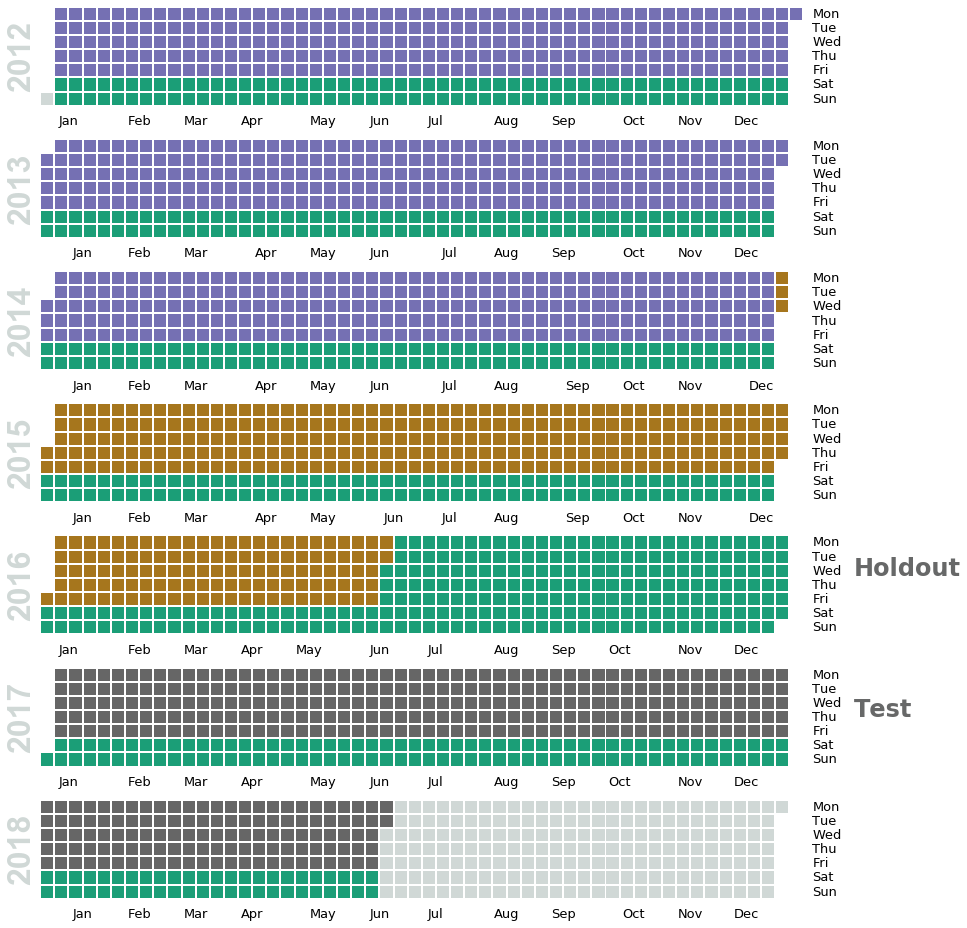

In [24]:
def train_test_split_h(df, start, finish):
    train= df.loc[df.date < start]
    test = df.loc[(df.date >= start)&\
                  (df.date <= finish)]
    return train, test
#to saving structure of test dataset(number of weekends, which are very important(hw1)) - getting holdout by weeks 
#(by day of months give worse results)
start = test_c2.date.min() - relativedelta(days=105 * 7)
finish = test_c2.date.max() - relativedelta(days = 105*7)
train_h, holdout = train_test_split_h(train_c2, start, finish)

#vizualizing periods 
total_data = pd.concat([train_h.date.value_counts() * 0.3 , holdout.date.value_counts() * 0.8 , test_c2.date.value_counts()])
fig, ax = calmap.calendarplot(total_data, fig_kws={"figsize":(15,13)}, fillcolor='#d0d8d6', cmap='Dark2')
fig.text(x=0.9, y=0.38, s="Holdout", fontsize=24, weight='bold', color='#676868')
fig.text(x=0.9, y=0.23, s="Test", fontsize=24, weight='bold', color='#676868')


In [25]:
#making new features
train_h = get_features(train_h)
test_c2 = get_features(test_c2)
holdout = get_features(holdout)

In [26]:
#droping dates
train_h = train_h.drop(['date'], axis = 1)
test_c2 = test_c2.drop(['date'], axis = 1)
holdout = holdout.drop(['date'], axis = 1)

# Working on model

In [27]:
from sklearn.model_selection import (
     GridSearchCV,cross_val_score   )
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,GradientBoostingClassifier, ExtraTreesClassifier


In [28]:
#preparing data for models
def prepare(train, test, test2):    
    X_train = train.drop(['target_class'], axis=1) #train part
    X_test = test.drop(['target_class'], axis=1) # holdout part
    
    y_train = train.target_class #train part
    y_test = test.target_class # holdout part
    
    xt = test2.drop(['target_class'], axis=1) # for test part
    yt = test2.target_class
    return X_train, X_test, y_train, y_test, xt, yt

xtrain, xtest, ytrain, ytest, xt, yt = prepare(train_h, holdout, test_c2)

# #basemodel ExtraTreesClassifier

In [30]:
%%time
ts = TimeSeriesSplit(n_splits=5)
etc = ExtraTreesClassifier(n_estimators=100, random_state=42, n_jobs=-1)
etc.fit(xtrain,ytrain)
results = cross_val_score(etc, xtrain, ytrain, cv=ts, scoring ='roc_auc')


Wall time: 1.96 s


In [31]:
test_holdout_score = roc_auc_score(ytest, etc.predict_proba(xtest)[:,1])

In [32]:
test_score = roc_auc_score(yt, etc.predict_proba(xt)[:,1])
print(test_score)

0.709259716007188


In [33]:
#feature selection
col_drop = []
importances = etc.feature_importances_
feat_labels = xtrain.columns[0:]
indices = np . argsort(importances)[::-1 ] 
for f in range(xtrain.shape[1]):
    if importances[indices[f]] < 0.000211:
        col_drop.append(feat_labels[indices[f]])
    print ("%2d) %- *s %f " % (f + 1, 30 , feat_labels[indices[f]] , importances[indices[f]]))  

 1) target_value                   0.103261 
 2) feature_1                      0.097403 
 3) feature_3                      0.094006 
 4) week                           0.084807 
 5) feature_13                     0.070818 
 6) feature_6                      0.070379 
 7) year                           0.066326 
 8) feature_4                      0.054704 
 9) feature_14                     0.052524 
10) feature_9                      0.051081 
11) feature_7                      0.044945 
12) feature_8                      0.044668 
13) feature_2                      0.043079 
14) feature_16                     0.038951 
15) feature_15                     0.034134 
16) feature_5                      0.029286 
17) dayofmonth                     0.016657 
18) dayofweek                      0.002969 


# #ExtraTreesClassifier with tunning parameters

In [34]:
%%time
rf = ExtraTreesClassifier(random_state=42, criterion='entropy', n_jobs=4)
param_grid = {'max_features': (  0.2, 0.5, 1),
            'max_depth': (15, 20, 25),
            'min_samples_leaf':(10,2),
            'n_estimators':(50, 75,100,150)} 
grid_cv_et = GridSearchCV(rf, param_grid, cv=ts, scoring='roc_auc', verbose=1, n_jobs=4)
grid_cv_et.fit(xtrain, ytrain)
best_et = grid_cv_et.best_estimator_
et_score = grid_cv_et.best_score_
print(f"CV score {et_score}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   24.2s
[Parallel(n_jobs=4)]: Done 360 out of 360 | elapsed:   43.6s finished


CV score 0.7085165897369312
Wall time: 44.2 s


In [35]:
test_holdout_score_et = roc_auc_score(ytest, best_et.predict_proba(xtest)[:,1])

In [36]:
test_score_et = roc_auc_score(yt, best_et.predict_proba(xt)[:,1])
print(test_score_et)

0.802931538705472


# RandomForestClassifier with tunning parameters

In [37]:
%%time
rf = RandomForestClassifier(random_state=42, criterion='entropy', n_jobs=4)
param_grid = {'max_features': (  0.2, 0.5, 1),
            'max_depth': (15, 20, 25),
            'min_samples_leaf':(6,2),
            'n_estimators':(100,150)} 
grid_cv_rf = GridSearchCV(rf, param_grid, cv=ts, scoring='roc_auc', verbose=1, n_jobs=4)
grid_cv_rf.fit(xtrain, ytrain)
best_rf = grid_cv_rf.best_estimator_
rf_score = grid_cv_rf.best_score_


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.6s
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed:   32.3s finished


Wall time: 32.9 s


In [38]:
test_score_rf = roc_auc_score(yt, best_rf.predict_proba(xt)[:,1])
print(test_score_rf)

0.7711497128360523


# #BaggingClassifier with tunning parameters ( used RandomForestClassifier as estimator)

In [42]:
#BaggingClassifier with tunning parameters ( used RandomForestClassifier as estimator)
best_bag = BaggingClassifier(base_estimator=best_rf, n_estimators=50, max_features=0.95, n_jobs=-1)
bag_score = cross_val_score(best_bag, xtrain, ytrain, cv=ts, n_jobs=-1, scoring='roc_auc').mean()
best_bag.fit(xtrain,ytrain)


BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=20, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=4,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=0.95,
         max_samples=1.0, n_estimators=50, n_jobs=4, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [43]:
test_score_bag = roc_auc_score(yt, best_bag.predict_proba(xt)[:,1])
print(test_score_bag )

0.8403157041682816


## GradientBoostingClassifier with tunning parameters

In [44]:
#GradientBoostingClassifier with tunning parameters
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance", 'exponential'],
              'n_estimators' : [100,200,250, 300],
              'learning_rate': [ 0.01, 0.05, 0.1],
              'max_depth': [8, 7,10, 15],
              'min_samples_leaf': [25, 150, 100,],
              'max_features': [5, 6,  8, 10, 15] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=ts, scoring="roc_auc", n_jobs= -1, verbose = 1)

gsGBC.fit(xtrain,ytrain)

GBC_best = gsGBC.best_estimator_


Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed:  7.4min finished


In [46]:
GBC_best = gsGBC.best_estimator_
test_score_gbm = roc_auc_score(yt, GBC_best.predict_proba(xt)[:,1])
print(test_score_gbm)

0.6387019484866636


## Staking

In [47]:
def get_results(estimator, ts, xtrain, ytrain, xtest):
    estimator.fit(xtrain, ytrain)
    predictions = estimator.predict_proba(xtest)[:, 1]
    
    predictions_cv = []
    for train_idx, val in ts.split(xtrain, ytrain):
        estimator.fit(xtrain.iloc[train_idx], ytrain.iloc[train_idx])
        predictions_cv.append([ytrain.iloc[val], estimator.predict_proba(xtrain.iloc[val])[:,1]])

    return predictions, predictions_cv

In [48]:
rf_predictions, rf_predictions_cv = get_results(best_rf, ts, xtrain, ytrain, xt)
et_predictions, et_predictions_cv = get_results(best_et, ts, xtrain, ytrain, xt)
bag_predictions, bag_predictions_cv = get_results(best_bag, ts, xtrain, ytrain, xt)
gbm_predictions, gbm_predictions_cv = get_results(GBC_best, ts, xtrain, ytrain, xt)

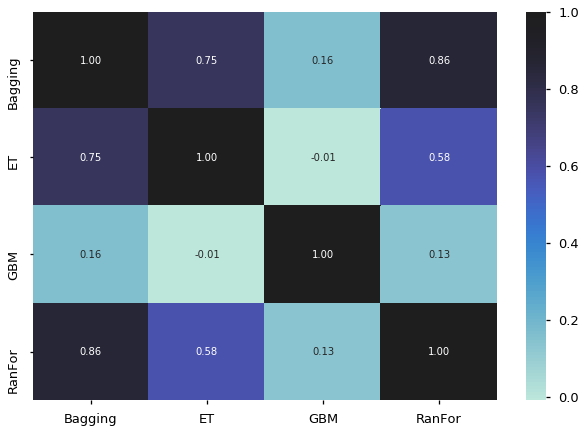

In [49]:
#Correlation between meta features
preds = pd.DataFrame({'ET': et_predictions, 'RanFor':rf_predictions,
              'GBM' : gbm_predictions, 'Bagging': bag_predictions})
sns.heatmap(preds.corr(), annot=True, fmt='.2f', center = True)

In [50]:
xtrain_stacked = xtrain.copy()
xt_stacked = xt.copy()

xtrain_stacked["et_preds"] = 0
xtrain_stacked["rf_preds"] = 0
xtrain_stacked["bag_preds"] = 0
xtrain_stacked["gbm"] = 0


xt_stacked["et_preds"] = et_predictions
xt_stacked["rf_preds"] = rf_predictions
xt_stacked["bag_preds"] = bag_predictions
xt_stacked["gbm"] = gbm_predictions

for i, fold in enumerate(ts.split(xtrain, ytrain)):
    train, val = fold[0], fold[1]
    xtrain_stacked.iloc[val, -4] = et_predictions_cv[i][1]
    xtrain_stacked.iloc[val, -3] = rf_predictions_cv[i][1]
    xtrain_stacked.iloc[val, -2] = bag_predictions_cv[i][1]
    xtrain_stacked.iloc[val, -1] = gbm_predictions_cv[i][1]
 

In [51]:
meta_estmator = RandomForestClassifier(random_state=42, criterion='entropy', n_jobs=4)
meta_estmator.fit(xtrain_stacked, ytrain)
stacked_predictions = meta_estmator.predict_proba(xt_stacked)[:, 1]

In [52]:
base_stack_score = cross_val_score(meta_estmator, xtrain_stacked, ytrain, cv=ts, n_jobs=-1, scoring='roc_auc').mean()
print(base_stack_score)

0.4990873723908802


([<matplotlib.axis.YTick at 0x22431be62b0>,
 <a list of 20 Text yticklabel objects>)

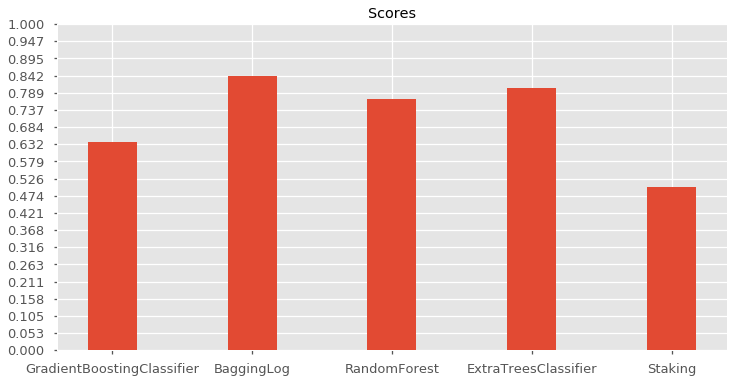

In [53]:
#Score plot
cv_scores = [test_score_gbm, test_score_bag, test_score_rf, test_score_et,base_stack_score]
estimators = ['GradientBoostingClassifier', 'BaggingLog' ,'RandomForest', 'ExtraTreesClassifier', 'Staking']
style.use('ggplot')
ind = np.arange(len(estimators)) 
width = 0.35    
plt.rcParams['figure.figsize'] = 12, 6 
p = plt.bar(ind, cv_scores, width)

plt.title('Scores')
plt.xticks(ind, (estimators))
plt.yticks(np.linspace(0, 1, 20),  )



([<matplotlib.axis.YTick at 0x1d9666bc7f0>,
 <a list of 5 Text yticklabel objects>)

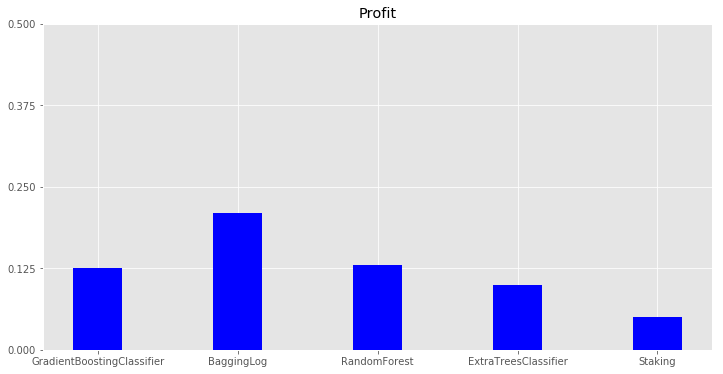

In [9]:
cv_scores = [0.125, 0.21, 0.13,0.1, 0.05]
estimators = ['GradientBoostingClassifier', 'BaggingLog' ,'RandomForest', 'ExtraTreesClassifier', 'Staking']
style.use('ggplot')
ind = np.arange(len(estimators)) 
width = 0.35    
plt.rcParams['figure.figsize'] = 12, 6 
p = plt.bar(ind, cv_scores, width, color = 'b')

plt.title('Profit')
plt.xticks(ind, (estimators))
plt.yticks(np.linspace(0, 0.5, 5),  )

# The best model is BaggingClassifier with tunning parameters ( used RandomForestClassifier as estimator)